In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.head(5))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [3]:
print('Training Set')
print(train.shape)
print('')
print(train.isna().sum())
print('')
print('')
print('Test Set')
print(test.shape)
print('')
print(test.isna().sum())

Training Set
(1460, 81)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrS

In [4]:
train = train.drop(columns=['Id','Alley','PoolQC','Fence','MiscFeature'])
train.LotFrontage.fillna(train.LotFrontage.mean(),inplace=True)
train.MasVnrType.fillna(train.MasVnrType.mode()[0],inplace=True)
train.MasVnrArea.fillna(train.MasVnrArea.mean(),inplace=True)
train.BsmtQual.fillna(train.BsmtQual.mode()[0],inplace=True)
train.BsmtCond.fillna(train.BsmtCond.mode()[0],inplace=True)
train.BsmtExposure.fillna(train.BsmtExposure.mode()[0],inplace=True)
train.BsmtFinType1.fillna(train.BsmtFinType1.mode()[0],inplace=True)
train.BsmtFinType2.fillna(train.BsmtFinType2.mode()[0],inplace=True)
train.Electrical.fillna(train.Electrical.mode()[0],inplace=True)
train.FireplaceQu.fillna(train.FireplaceQu.mode()[0],inplace=True)
train.GarageType.fillna(train.GarageType.mode()[0],inplace=True)
train.GarageYrBlt.fillna(train.GarageYrBlt.mean(),inplace=True)
train.GarageFinish.fillna(train.GarageFinish.mode()[0],inplace=True)
train.GarageQual.fillna(train.GarageQual.mode()[0],inplace=True)
train.GarageCond.fillna(train.GarageCond.mode()[0],inplace=True)

print(train.isna().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [5]:
test = test.drop(columns=['Id','Alley','PoolQC','Fence','MiscFeature'])
test.MSZoning.fillna(test.MSZoning.mode()[0],inplace=True)
test.LotFrontage.fillna(test.LotFrontage.mean(),inplace=True)
test.Utilities.fillna(test.Utilities.mode()[0],inplace=True)
test.Exterior1st.fillna(test.Exterior1st.mode()[0],inplace=True)
test.Exterior2nd.fillna(test.Exterior2nd.mode()[0],inplace=True)
test.MasVnrType.fillna(test.MasVnrType.mode()[0],inplace=True)
test.MasVnrArea.fillna(test.MasVnrArea.mean(),inplace=True)
test.BsmtQual.fillna(test.BsmtQual.mode()[0],inplace=True)
test.BsmtCond.fillna(test.BsmtCond.mode()[0],inplace=True)
test.BsmtExposure.fillna(test.BsmtExposure.mode()[0],inplace=True)
test.BsmtFinType1.fillna(test.BsmtFinType1.mode()[0],inplace=True)
test.BsmtFinSF1.fillna(test.BsmtFinSF1.mean(),inplace=True)
test.BsmtFinType2.fillna(test.BsmtFinType2.mode()[0],inplace=True)
test.BsmtFinSF2.fillna(test.BsmtFinSF2.mean(),inplace=True)
test.BsmtUnfSF.fillna(test.BsmtUnfSF.mean(),inplace=True)
test.TotalBsmtSF.fillna(test.TotalBsmtSF.mean(),inplace=True)
test.BsmtFullBath.fillna(test.BsmtFullBath.mode()[0],inplace=True)
test.BsmtHalfBath.fillna(test.BsmtHalfBath.mode()[0],inplace=True)
test.KitchenQual.fillna(test.KitchenQual.mode()[0],inplace=True)
test.Functional.fillna(test.Functional.mode()[0],inplace=True)
test.FireplaceQu.fillna(test.FireplaceQu.mode()[0],inplace=True)
test.GarageType.fillna(test.GarageType.mode()[0],inplace=True)
test.GarageYrBlt.fillna(test.GarageYrBlt.mean(),inplace=True)
test.GarageFinish.fillna(test.GarageFinish.mode()[0],inplace=True)
test.GarageCars.fillna(test.GarageCars.mode()[0],inplace=True)
test.GarageArea.fillna(test.GarageArea.mean(),inplace=True)
test.GarageQual.fillna(test.GarageQual.mode()[0],inplace=True)
test.GarageCond.fillna(test.GarageCond.mode()[0],inplace=True)
test.SaleType.fillna(test.SaleType.mode()[0],inplace=True)

print(test.isna().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [6]:
features = test.columns.values
train_y = train.SalePrice

categorical_features = []
numerical_features = []

for feature in features:
    feature_type = train.dtypes[feature]
    if (feature_type == 'int64' or feature_type == 'float64'):
        numerical_features.append(feature)
    else:
        categorical_features.append(feature)

train_x_num = train[numerical_features]
test_x_num = test[numerical_features]

scaler = StandardScaler()
scaler.fit(train_x_num)
train_x_num = pd.DataFrame(scaler.transform(train_x_num))
test_x_num = pd.DataFrame(scaler.transform(test_x_num))

train_x_cat = train[categorical_features]
test_x_cat = test[categorical_features]

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(train_x_cat)
train_x_cat = pd.DataFrame(enc.transform(train_x_cat).toarray())
test_x_cat = pd.DataFrame(enc.transform(test_x_cat).toarray())

train_x = pd.concat((train_x_num,train_x_cat),axis=1)
test_x = pd.concat((test_x_num,test_x_cat),axis=1)

In [7]:
feature_coefs = []
reg_coefs = np.logspace(-5,5,11)

for reg_coef in reg_coefs:
    model = Lasso(alpha=reg_coef)
    model.fit(train_x,train_y)
    feature_coefs.append(model.coef_)

C:\Users\momo2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159682617265.5121, tolerance: 920791133.4609977
  model = cd_fast.enet_coordinate_descent(
C:\Users\momo2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159682938614.42697, tolerance: 920791133.4609977
  model = cd_fast.enet_coordinate_descent(
C:\Users\momo2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159686483140.62234, tolerance: 920791133.4609977
  model = cd_fast.enet_coordinate_descent(
C:\Users\momo2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

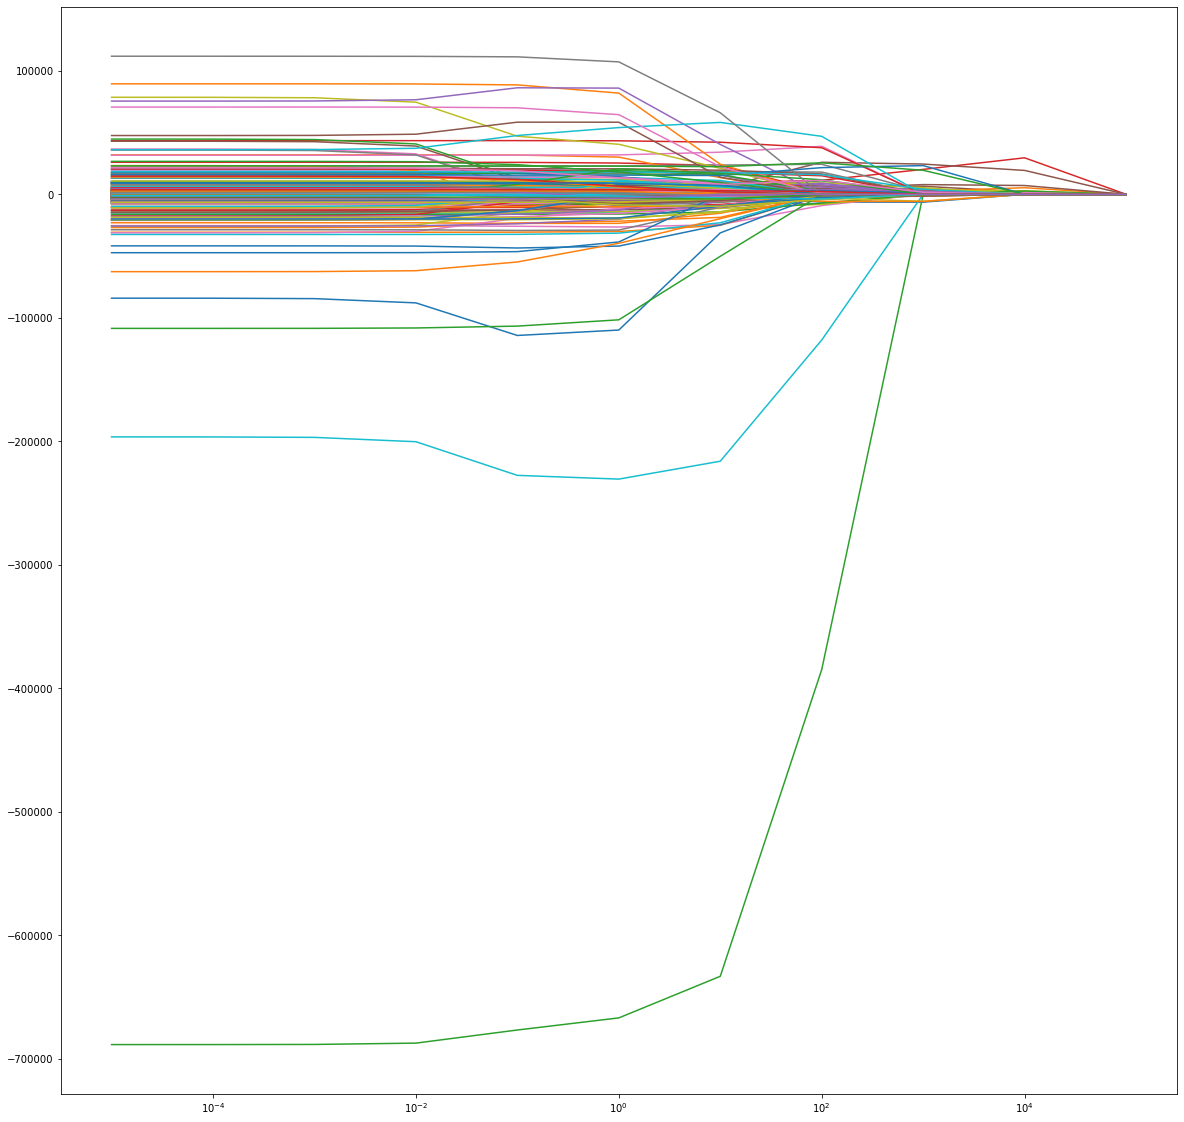

In [8]:
_ = plt.figure(figsize=(20,20))
_  = plt.plot(reg_coefs,feature_coefs)
_ = plt.xscale('log')

In [9]:
selection = SelectFromModel(Lasso(alpha=10**-2))
selection.fit(train_x,train_y)
nonzero_coefs = selection.get_support()

train_x = train_x.loc[:,nonzero_coefs]
test_x = test_x.loc[:,nonzero_coefs]

C:\Users\momo2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125354128976.8505, tolerance: 920791133.4609977
  model = cd_fast.enet_coordinate_descent(


In [10]:
grid = {'alpha':np.logspace(-5,5,50,base=10)}
model = Ridge()
model_cv = GridSearchCV(model,grid,cv=6)
model_cv.fit(train_x,train_y)
model_cv.best_params_

{'alpha': 21.209508879201927}

In [11]:
test_predictions = model_cv.predict(test_x)
test_predictions = test_predictions.astype(int)

df_test = pd.read_csv("test.csv")
to_save = df_test[['Id']].copy()
to_save.loc[:, 'SalePrice'] = test_predictions
to_save.to_csv('housePrice_submission.csv', index=False)

# Attempt 2

In [12]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train = train.drop(columns=['Id','Alley','PoolQC','Fence','MiscFeature'])
train.LotFrontage.fillna(train.LotFrontage.mean(),inplace=True)
train.MasVnrType.fillna(train.MasVnrType.mode()[0],inplace=True)
train.MasVnrArea.fillna(train.MasVnrArea.mean(),inplace=True)
train.BsmtQual.fillna(train.BsmtQual.mode()[0],inplace=True)
train.BsmtCond.fillna(train.BsmtCond.mode()[0],inplace=True)
train.BsmtExposure.fillna(train.BsmtExposure.mode()[0],inplace=True)
train.BsmtFinType1.fillna(train.BsmtFinType1.mode()[0],inplace=True)
train.BsmtFinType2.fillna(train.BsmtFinType2.mode()[0],inplace=True)
train.Electrical.fillna(train.Electrical.mode()[0],inplace=True)
train.FireplaceQu.fillna(train.FireplaceQu.mode()[0],inplace=True)
train.GarageType.fillna(train.GarageType.mode()[0],inplace=True)
train.GarageYrBlt.fillna(train.GarageYrBlt.mean(),inplace=True)
train.GarageFinish.fillna(train.GarageFinish.mode()[0],inplace=True)
train.GarageQual.fillna(train.GarageQual.mode()[0],inplace=True)
train.GarageCond.fillna(train.GarageCond.mode()[0],inplace=True)

test = test.drop(columns=['Id','Alley','PoolQC','Fence','MiscFeature'])
test.MSZoning.fillna(test.MSZoning.mode()[0],inplace=True)
test.LotFrontage.fillna(test.LotFrontage.mean(),inplace=True)
test.Utilities.fillna(test.Utilities.mode()[0],inplace=True)
test.Exterior1st.fillna(test.Exterior1st.mode()[0],inplace=True)
test.Exterior2nd.fillna(test.Exterior2nd.mode()[0],inplace=True)
test.MasVnrType.fillna(test.MasVnrType.mode()[0],inplace=True)
test.MasVnrArea.fillna(test.MasVnrArea.mean(),inplace=True)
test.BsmtQual.fillna(test.BsmtQual.mode()[0],inplace=True)
test.BsmtCond.fillna(test.BsmtCond.mode()[0],inplace=True)
test.BsmtExposure.fillna(test.BsmtExposure.mode()[0],inplace=True)
test.BsmtFinType1.fillna(test.BsmtFinType1.mode()[0],inplace=True)
test.BsmtFinSF1.fillna(test.BsmtFinSF1.mean(),inplace=True)
test.BsmtFinType2.fillna(test.BsmtFinType2.mode()[0],inplace=True)
test.BsmtFinSF2.fillna(test.BsmtFinSF2.mean(),inplace=True)
test.BsmtUnfSF.fillna(test.BsmtUnfSF.mean(),inplace=True)
test.TotalBsmtSF.fillna(test.TotalBsmtSF.mean(),inplace=True)
test.BsmtFullBath.fillna(test.BsmtFullBath.mode()[0],inplace=True)
test.BsmtHalfBath.fillna(test.BsmtHalfBath.mode()[0],inplace=True)
test.KitchenQual.fillna(test.KitchenQual.mode()[0],inplace=True)
test.Functional.fillna(test.Functional.mode()[0],inplace=True)
test.FireplaceQu.fillna(test.FireplaceQu.mode()[0],inplace=True)
test.GarageType.fillna(test.GarageType.mode()[0],inplace=True)
test.GarageYrBlt.fillna(test.GarageYrBlt.mean(),inplace=True)
test.GarageFinish.fillna(test.GarageFinish.mode()[0],inplace=True)
test.GarageCars.fillna(test.GarageCars.mode()[0],inplace=True)
test.GarageArea.fillna(test.GarageArea.mean(),inplace=True)
test.GarageQual.fillna(test.GarageQual.mode()[0],inplace=True)
test.GarageCond.fillna(test.GarageCond.mode()[0],inplace=True)
test.SaleType.fillna(test.SaleType.mode()[0],inplace=True)

In [13]:
train, val = train_test_split(train,test_size=0.2)

features = test.columns.values
train_y = train.SalePrice
val_y = val.SalePrice

categorical_features = []
numerical_features = []

for feature in features:
    feature_type = train.dtypes[feature]
    if (feature_type == 'int64' or feature_type == 'float64'):
        numerical_features.append(feature)
    else:
        categorical_features.append(feature)

train_x_num = train[numerical_features]
val_x_num = val[numerical_features]
test_x_num = test[numerical_features]

scaler = StandardScaler()
scaler.fit(train_x_num)
train_x_num = pd.DataFrame(scaler.transform(train_x_num))
val_x_num = pd.DataFrame(scaler.transform(val_x_num))
test_x_num = pd.DataFrame(scaler.transform(test_x_num))

train_x_cat = train[categorical_features]
val_x_cat = val[categorical_features]
test_x_cat = test[categorical_features]

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(train_x_cat)
train_x_cat = pd.DataFrame(enc.transform(train_x_cat).toarray())
val_x_cat = pd.DataFrame(enc.transform(val_x_cat).toarray())
test_x_cat = pd.DataFrame(enc.transform(test_x_cat).toarray())

train_x = pd.concat((train_x_num,train_x_cat),axis=1)
val_x = pd.concat((val_x_num,val_x_cat),axis=1)
test_x = pd.concat((test_x_num,test_x_cat),axis=1)

In [14]:
selection = SelectFromModel(Lasso(alpha=10**-2))
selection.fit(train_x,train_y)
nonzero_coefs = selection.get_support()

train_x = train_x.loc[:,nonzero_coefs]
val_x = val_x.loc[:,nonzero_coefs]
test_x = test_x.loc[:,nonzero_coefs]

C:\Users\momo2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100678727847.40149, tolerance: 734225203.5014156
  model = cd_fast.enet_coordinate_descent(


In [15]:
models = []
for reg_coef in np.logspace(-4,4,20):
    model = Ridge(alpha=reg_coef)
    model.fit(train_x,train_y)
    train_preds = model.predict(train_x)
    val_preds = model.predict(val_x)
    train_rmse = np.sqrt(np.mean((train_preds-train_y)**2))
    val_rmse = np.sqrt(np.mean((val_preds-val_y)**2))
    models.append({
        'model': model,
        'reg_coef': reg_coef,
        'train_rmse': train_rmse,
        'val_rmse': val_rmse
    })
    
models = pd.DataFrame(models)

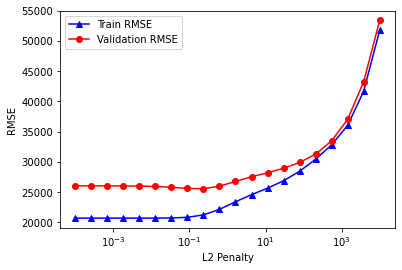

In [16]:
_ = plt.plot(models.reg_coef,models.train_rmse,'b-^',label='Train RMSE')
_ = plt.plot(models.reg_coef,models.val_rmse,'r-o',label='Validation RMSE')
_ = plt.xlabel('L2 Penalty')
_ = plt.ylabel('RMSE')
_ = plt.xscale('log')
_ = plt.legend()

In [17]:
index = models.val_rmse.idxmin()
best_model_row = models.loc[index]
best_model = best_model_row.model

In [18]:
test_predictions = best_model.predict(test_x)
test_predictions = test_predictions.astype(int)

df_test = pd.read_csv("test.csv")
to_save = df_test[['Id']].copy()
to_save.loc[:, 'SalePrice'] = test_predictions
to_save.to_csv('housePrice_submission.csv', index=False)